# Notebook to analyze UV-vis data

In [7]:
# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [26]:
# Import data
data = pd.read_excel('./UV_Vis/Paninis_Jan_2019.xlsx', sheet_name='Sheet1')
columns = data.columns
data["Energy"] = (4.135667516E-15)*(299792458)/(data[columns[0]]*1E-9)
columns = data.columns
data.head()

,Wavelength nm.,Paninis_Jan_2019_131550,Paninis_Jan_2019_132127,Paninis_Jan_2019_132536,Paninis_Jan_2019_133105,Paninis_Jan_2019_142951,Paninis_Jan_2019_141518,Paninis_Jan_2019_141916,Paninis_Jan_2019_142249,Energy
0,200.0,0.548,0.292,1.599,0.367,0.948,0.062,2.077,0.497,6.199210
1,200.5,0.548,0.293,1.600,0.367,0.949,0.062,2.077,0.497,6.183750
2,201.0,0.549,0.293,1.601,0.368,0.949,0.062,2.077,0.497,6.168368
3,201.5,0.549,0.293,1.602,0.368,0.949,0.062,2.077,0.497,6.153062
4,202.0,0.613,0.035,1.315,0.219,0.002,0.001,0.004,0.001,6.137831


In [27]:
columns

Index(['Wavelength nm.', 'Paninis_Jan_2019_131550', 'Paninis_Jan_2019_132127',
       'Paninis_Jan_2019_132536', 'Paninis_Jan_2019_133105',
       'Paninis_Jan_2019_142951', 'Paninis_Jan_2019_141518',
       'Paninis_Jan_2019_141916', 'Paninis_Jan_2019_142249', 'Energy'],
      dtype='object')

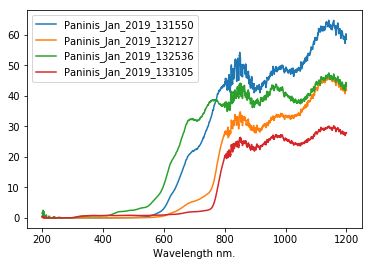

In [28]:
data.plot(x=columns[0], y=[columns[1], columns[2], 
                           columns[3], columns[4]])

In [29]:
for column in columns[1:5]:
    name = 'A_' + column
    data[name] = 100 - data[column]
columns = data.columns

In [33]:
len(columns)

14

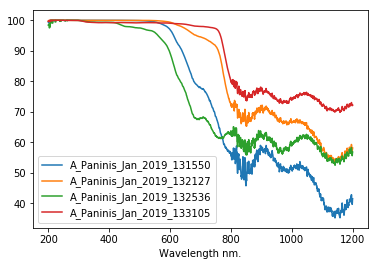

In [34]:
data.plot(x=columns[0], y=[columns[10], columns[11], 
                           columns[12], columns[13]])

In [35]:
for column in [columns[1], columns[2], columns[3], columns[4]]:    
    absorbance = 100 - data[column]
    alpha = -(1/0.00000050)*np.log(data[column]/100)
    name = column + '_Tauc_direct'
    data[name] = np.power(data['Energy'], 2) * np.power(alpha, 2)
    
columns = data.columns

/Users/otrejo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/otrejo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
len(columns)

18

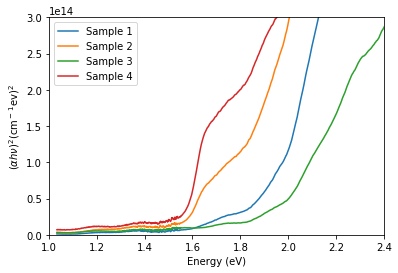

In [53]:
data.plot(x='Energy', y=[columns[14], columns[15],
                        columns[16], columns[17]])
plt.xlim(1, 2.4)
plt.ylim(0, 0.3E15)
plt.xlabel('Energy (eV)')
plt.ylabel(r'($\alpha h \nu$)$^2$(cm$^-$$^1$ev)$^2$')
plt.legend(['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4'])
plt.savefig('tauc_plots_paninis.png', dpi=300)

In [17]:
for column in [columns[8], columns[4], columns[9]]:    
    absorbance = 100 - data[column]
    alpha = -(1/0.00000003)*np.log(data[column]/100)
    name = column[0:8] + '_Tauc_indirect'
    data[name] = np.power(data['Energy'], 0.5) * np.power(alpha, 0.5)
    
columns = data.columns

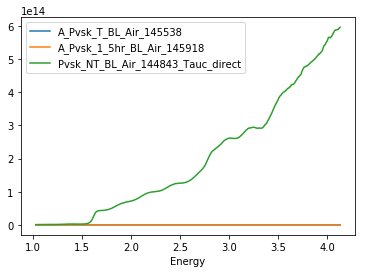

In [18]:
data.plot(x='Energy', y=[columns[17], columns[18], columns[19]])

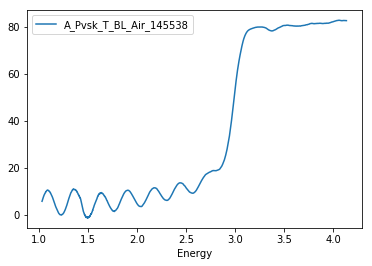

In [19]:
data.plot(x='Energy', y=[columns[17]])